# PSC Lab - Practical 8

## Roll No: 18BCE259

a. Design a python program which performs the linear
regression operation on the given data to predict the house
price. Also, visualize the data for different attributes.


### For these problem we will be implementing two methods
### 1. sklearn API
### 2. Hill Climbing Method

## Using sklearn API

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
melbourne_file_path = 'Melbourne_data/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
melbourne_data = melbourne_data.dropna(axis = 0)

In [5]:
melbourne_data.shape

(6196, 21)

In [6]:
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.068828e+06,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,0.971079,6.751564e+05,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.200000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,3.000000,8.800000e+05,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,4.000000,1.325000e+06,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


In [7]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'YearBuilt']

In [8]:
X = melbourne_data[melbourne_features]
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude,YearBuilt
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201,1964.081988
std,0.971079,0.711362,897.449881,0.075850,0.099165,38.105673
min,1.000000,1.000000,0.000000,-38.164920,144.542370,1196.000000
25%,2.000000,1.000000,152.000000,-37.855438,144.926198,1940.000000
50%,3.000000,1.000000,373.000000,-37.802250,144.995800,1970.000000
75%,4.000000,2.000000,628.000000,-37.758200,145.052700,2000.000000
max,8.000000,8.000000,37000.000000,-37.457090,145.526350,2018.000000


In [9]:
Y = melbourne_data['Price']

In [10]:
Y.describe()

count    6.196000e+03
mean     1.068828e+06
std      6.751564e+05
min      1.310000e+05
25%      6.200000e+05
50%      8.800000e+05
75%      1.325000e+06
max      9.000000e+06
Name: Price, dtype: float64

In [11]:
Y = Y/1e7

In [12]:
Y.describe()

count    6196.000000
mean        0.106883
std         0.067516
min         0.013100
25%         0.062000
50%         0.088000
75%         0.132500
max         0.900000
Name: Price, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression(n_jobs = -1)

In [15]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

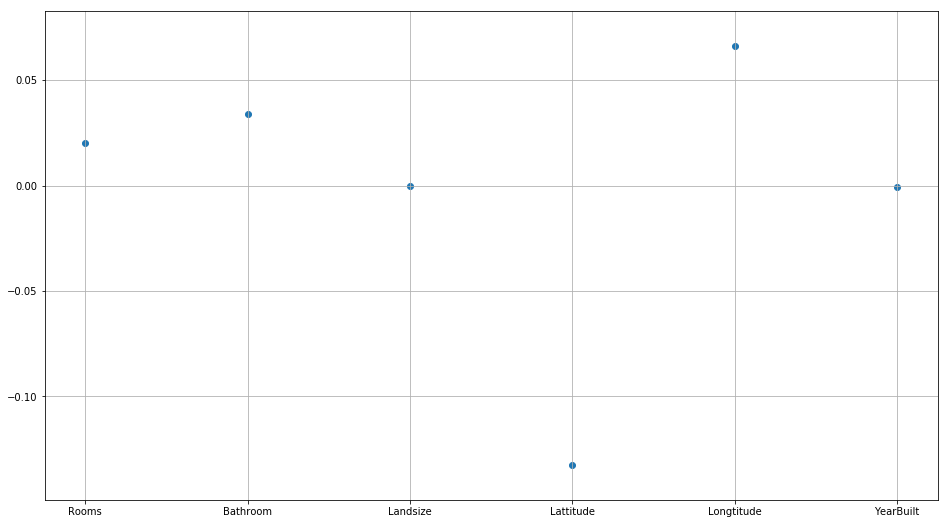

In [16]:
fig = plt.figure(figsize = (16,9))
plt.scatter(x = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'YearBuilt'],y = model.coef_)
plt.grid(True)

In [17]:
model.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': -1,
 'coef_': array([ 1.99679686e-02,  3.41740672e-02,  2.28203372e-06, -1.32317153e-01,
         6.63274139e-02, -5.85561457e-04]),
 '_residues': 11.917073712457281,
 'rank_': 6,
 'singular_': array([6.77967170e+04, 2.69463568e+03, 7.68816101e+01, 3.38961451e+01,
        7.39445575e+00, 4.60121263e+00]),
 'intercept_': -13.475674058386405}

In [18]:
y_predict = model.predict(X_test)

In [19]:
print(mean_absolute_error(y_test, y_predict))

0.031395725059841686


## Hill Climbing

In [20]:
import random
import numpy as np

In [21]:
# building model

# we have ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'YearBuilt'] as features
# y = b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4 + b5*x5 + b6*x6

# b0, b1, b2, b3, b4, b5, b6 = 0,0,0,0,0,0,0

b = np.array([[0,0,0,0,0,0,0]] ,dtype=np.float64)
b = b.T

In [22]:
b

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [23]:
melbourne_data['ones'] = 1

In [24]:
data = np.array(melbourne_data[['ones','Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'YearBuilt']])

In [25]:
np_price = np.array([melbourne_data['Price']])

In [26]:
np_price

array([[1035000., 1465000., 1600000., ...,  385000.,  560000., 2450000.]])

In [27]:
# number of iterations to perform
epochs = 10_000_000

In [28]:
best_loss = 10000000000000000000.0  # Initialize with a really large value

## The cell below is going to take computation time

In [29]:
# # for i in range(epochs):
#     if i%1000 == 0:
#         print(f"{ i/epochs * 100} % complete")
#     random_b = random.choice(range(7))

#     random_adjust = np.random.normal()

#     if random_b == 0:
#         b[0][0] += random_adjust
#     elif random_b == 1:
#         b[1][0] += random_adjust
#     elif random_b == 2:
#         b[2][0] += random_adjust
#     elif random_b == 3:
#         b[3][0] += random_adjust
#     elif random_b == 4:
#         b[4][0] += random_adjust
#     elif random_b == 5:
#         b[5][0] += random_adjust
#     elif random_b == 6:
#         b[6][0] += random_adjust

#     # Calculate loss, which is total mean squared error
#     new_loss = 0.0
    
#     dot_pr = data.dot(b)
#     dot_pr = dot_pr.T
#     temp = np_price - dot_pr
#     temp = temp**2
    
#     new_loss = np.sum(temp)
    
# #     for i, p in melbourne_data.iterrows():
# #         new_loss += (p['Price'] - (b0 + b1 * p['Rooms'] + b2 * p['Bathroom'] + b3 * p['Landsize'] + b4 * p['Lattitude'] + b5 * p['Longtitude'] + b6 * p['YearBuilt'])) ** 2

#     # If loss has improved, keep new values. Otherwise revert.
#     if new_loss < best_loss:
# #         print("z = {0} + {1}x1 + {2}x2 + {3}x3 + {4}x4 + {5}x5 + {6}x6".format(b[0][0], b[1][0], b[2][0], b[3][0],b[4][0], b[5][0], b[6][0]))
#         best_loss = new_loss
#     else:
#         if random_b == 0:
#             b[0][0] -= random_adjust
#         elif random_b == 1:
#             b[1][0] -= random_adjust
#         elif random_b == 2:
#             b[2][0] -= random_adjust
#         elif random_b == 3:
#             b[3][0] -= random_adjust
#         elif random_b == 4:
#             b[4][0] -= random_adjust
#         elif random_b == 5:
#             b[5][0] -= random_adjust
#         elif random_b == 6:
#             b[6][0] -= random_adjust

In [30]:
# print("z = {0} + {1}x1 + {2}x2 + {3}x3 + {4}x4 + {5}x5 + {6}x6".format(b[0][0], b[1][0], b[2][0], b[3][0],b[4][0], b[5][0], b[6][0]))

In [31]:
# model.coef_

In [32]:
# dot_pr = data.dot(b)
# y_predict_hc = dot_pr.T

In [33]:
# mean_absolute_error(np_price, y_predict_hc)

# 8b. Design a python program which implement the bisection and false positioning method.

In [34]:
def func(x):
    return (x**2) - (5*x) + 1

In [35]:
def falsePos(x0,x1,e,func):
    print("False Position Method\n================================\n")
    step = 1
    condition = True
    while condition:
        c = x0 - (x1-x0) * func(x0)/( func(x1) - func(x0) )
        print(f'Iteration-{step}, c = {c} and f(c) = {func(c)}')

        if func(x0) * func(c) < 0:
            x1 = c
        else:
            x0 = c

        step = step + 1
        condition = abs(func(c)) > e

    print(f'\nRequired root is: {c}')
    print(f"Steps required: {step-1}")

In [36]:
def bisection(x0,x1,e,func):
    print("Bisection Position Method\n================================\n")
    step = 1
    condition = True
    while condition:
        c = (x0 + x1)/2
        print(f'Iteration-{step}, c = {c} and f(c) = {func(c)}')

        if func(x0) * func(c) < 0:
            x1 = c
        else:
            x0 = c

        step = step + 1
        condition = abs(func(c)) > e

    print(f'\nRequired root is: {c}')
    print(f"Steps required: {step-1}")

In [37]:
def findRoot(func):
    x0 = float(input("Enter x0: "))
    x1 = float(input("Enter x1: "))
    e = float(input("Enter acceptable error, e: "))
    
    if func(x0) * func(x1) > 0.0:
        print('Given guess values do not bracket the root.')
        print('Try Again with different guess values.')
    else:
        falsePos(x0,x1,e,func)
        bisection(x0,x1,e,func)

In [39]:
findRoot(func)

Enter x0: -12
Enter x1: 12
Enter acceptable error, e: 0.000000001
Given guess values do not bracket the root.
Try Again with different guess values.


# 8c. Design a python program which generate the 100 random variable and find out the mean, medium and mode for the same.

In [40]:
import numpy as np
from scipy import stats

In [41]:
rn = np.random.randint(100,size=100)

In [42]:
rn

array([90, 54,  3, 64, 87, 72, 63, 47, 88, 54,  3, 18,  3, 54, 54, 85, 59,
       41, 36, 20, 73, 48, 54, 37, 83, 11, 68,  6,  3, 96,  4, 35, 83, 48,
       76, 70, 81, 98, 44,  9, 81, 42, 30, 62, 28, 61, 66, 97, 64,  3, 23,
       55, 73, 78, 88, 51, 16, 90, 83, 98, 71, 96, 74, 41, 35, 98, 63, 86,
       27, 25, 63, 53, 76, 43, 81, 63, 10, 35, 65, 34,  8, 97, 93,  4, 38,
        4, 42, 72, 26, 69, 75, 44, 60, 55, 98, 75,  9, 19, 79, 12])

In [43]:
rn_mean, rn_median, rn_mode = np.mean(rn), np.median(rn), stats.mode(rn)

In [44]:
rn_mode

ModeResult(mode=array([3]), count=array([5]))